# Initial Imports 

In [1]:
# Import dependencies 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import cpi

# sklearn is the Scikit-learn machine learning library for Python. 
# It has many modules, including one for linear regression, which we use here as our model
# We will use linear regression since we are trying to predict an outcome (i.e. salary) based on an input(s) (i.e. points)
from sklearn.linear_model import LinearRegression 

# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Import our final data file
df = pd.read_csv(Path('Resources/playerDataFinal.csv'))
# View the dataframe
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# View columns in Dataframe
df.columns

Index(['playerid', 'year', 'playername', 'position', 'age', 'teamabb', 'games',
       'gamestarted', 'mp', 'per', 'ts_percentage', 'threepar', 'ftr',
       'orb_percentage', 'drb_percentage', 'trb_percentage', 'ast_percentage',
       'stl_percentage', 'blk_percentage', 'tov_percentage', 'usg_percentage',
       'blank1', 'ows', 'dws', 'ws', 'wsper48', 'blank2', 'obpm', 'dbpm',
       'bpm', 'vorp', 'fg', 'fga', 'fg_percentage', 'threep', 'threepa',
       'threep_percentage', 'twop', 'twopa', 'twop_percentage',
       'efg_percentage', 'ft', 'fta', 'ft_percentage', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'salaryid', 'salaryname',
       'salary', 'seasonstart', 'seasonend', 'teamabbrevated', 'fullteam',
       'seasonyear', 'team', 'record', 'wins', 'losses', 'win_percentage',
       'teamshort'],
      dtype='object')

In [4]:
# Filter df to include columns we want, and dropping the ones we don't need  
filtered_df = df[[
    'playerid', 'year', 'playername', 'position', 'age', 'teamabb', 'games',
       'gamestarted', 'mp', 'per', 'ts_percentage', 'threepar', 'ftr',
       'ows', 'dws', 'ws', 'fg', 'fga', 'fg_percentage', 'threep', 'threepa',
       'threep_percentage', 'twop', 'twopa', 'twop_percentage',
       'efg_percentage', 'ft', 'fta', 'ft_percentage', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'salaryid', 'salaryname',
       'salary', 'seasonstart', 'seasonend', 'teamabbrevated', 'fullteam',
       'seasonyear', 'team', 'record', 'wins', 'losses', 'win_percentage',
       'teamshort'
]]

filtered_df

,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop values where the year is below 1990 because there wouldn't be salary data for that, and that is our target variable
dropped_df = filtered_df[filtered_df['year'] >= 1990]
dropped_df

,playerid,year,playername,position,age,teamabb,games,gamestarted,mp,per,...,seasonend,teamabbrevated,fullteam,seasonyear,team,record,wins,losses,win_percentage,teamshort
5370,22272,2014.0,Lou Amundson,PF,31.0,CHI,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,2014.0,Bulls,50-32,50.0,32.0,0.610,CHI
9548,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,1991.0,ORL,Orlando Magic,1990.0,Magic,31-51,31.0,51.0,0.378,ORL
9549,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,1991.0,DEN,Denver Nuggets,1990.0,Nuggets,20-62,20.0,62.0,0.244,DEN
9550,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,1991.0,DET,Detroit Pistons,1990.0,Pistons,50-32,50.0,32.0,0.610,DET
9551,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,1991.0,POR,Portland Trail Blazers,1990.0,Kings,25-57,25.0,57.0,0.305,SAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25278,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,2018.0,CHA,Charlotte Hornets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25279,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,2018.0,NJN,Brooklyn Nets,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25280,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,2018.0,LAL,Los Angeles Lakers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,2018.0,CHI,Chicago Bulls,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Group the dataframe by playername and year 
# there are instances where the player could have played for multiple teams in a year 
# we need to sum the player stats for that year since the player stats are recorded across the multiple teams 
# there are columns however, that would need to be averaged such as their salary since the salary is reported annually and stays the same across the multiple teams
# we have tried passing specific columns to the .sum function but it still sums every column so we will not pass columns to the function

sum_grouped_df = pd.DataFrame(dropped_df.groupby(["playername","year"]).sum())

# Drop the index from the above dataframe so that we still retain the player name as a column
sum_grouped_df = sum_grouped_df.reset_index(drop=False, inplace=False)

# We need a common id to join the values across the tables so we will create one by joining the year and player name 
sum_grouped_df['yearconverted'] = sum_grouped_df['year'].astype(str)
sum_grouped_df['joiner'] = sum_grouped_df['playername'] + sum_grouped_df['yearconverted']

# view the sum grouped dataframe
sum_grouped_df

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,0.0,0.0,0.0,0.000,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,0.0,0.0,0.0,0.0,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


In [7]:
# In order to get the average values, we will run the same function above but using "mean" instead of sum
# Again, regardless of passing columns to the function, it averages everything still so we won't pass columns
avg_grouped_df = pd.DataFrame(dropped_df.groupby(["playername","year"]).mean())

# Drop the index from the above dataframe so that we still retain the player name as a column
avg_grouped_df = avg_grouped_df.reset_index(drop=False, inplace=False)

# We need a common id to join the values across the tables so we will create one by joining the year and player name 
avg_grouped_df['yearconverted'] = avg_grouped_df['year'].astype(str)
avg_grouped_df['joiner'] = avg_grouped_df['playername'] + avg_grouped_df['yearconverted']

# view the average grouped dataframe
avg_grouped_df

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
0,A.C. Green,1990.0,9688.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0,A.C. Green1990.0
1,A.C. Green,1991.0,10166.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0,A.C. Green1991.0
2,A.C. Green,1992.0,10617.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0,A.C. Green1992.0
3,A.C. Green,1993.0,11060.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0,A.C. Green1993.0
4,A.C. Green,1994.0,11529.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0,A.C. Green1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0,Zydrunas Ilgauskas2007.0
12334,Zydrunas Ilgauskas,2008.0,19003.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0,Zydrunas Ilgauskas2008.0
12335,Zydrunas Ilgauskas,2009.0,19600.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0,Zydrunas Ilgauskas2009.0
12336,Zydrunas Ilgauskas,2010.0,20187.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0,Zydrunas Ilgauskas2010.0


In [8]:
# View columns in the new dataframes 
sum_grouped_df.dtypes

playername            object
year                 float64
playerid               int64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

In [9]:
# View columns in the new dataframes 
avg_grouped_df.dtypes

playername            object
year                 float64
playerid             float64
age                  float64
games                float64
gamestarted          float64
mp                   float64
per                  float64
ts_percentage        float64
threepar             float64
ftr                  float64
ows                  float64
dws                  float64
ws                   float64
fg                   float64
fga                  float64
fg_percentage        float64
threep               float64
threepa              float64
threep_percentage    float64
twop                 float64
twopa                float64
twop_percentage      float64
efg_percentage       float64
ft                   float64
fta                  float64
ft_percentage        float64
orb                  float64
drb                  float64
trb                  float64
ast                  float64
stl                  float64
blk                  float64
tov                  float64
pf            

In [10]:
# To test our data using a value/player we know has player for multiple teams in a year 
# we can see that certain columns (i.e. seasonstart and seasonend) they have beben summed when we need an average 
testSumDF = sum_grouped_df.loc[sum_grouped_df["playername"] == "Yogi Ferrell"]
testSumDF

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,35496.0,3937833.0,6051.0,6054.0,0.0,0.0,0.0,0.0,2017.0,Yogi Ferrell2017.0


In [11]:
# To test our data using a value/player we know has player for multiple teams in a year 
# we can now see that we have the same columns as averages 
testAvgDF = avg_grouped_df.loc[avg_grouped_df["playername"] == "Yogi Ferrell"]
testAvgDF

,playername,year,playerid,age,games,gamestarted,mp,per,ts_percentage,threepar,...,salaryid,salary,seasonstart,seasonend,seasonyear,wins,losses,win_percentage,yearconverted,joiner
12264,Yogi Ferrell,2017.0,24260.0,23.0,30.666667,19.333333,798.0,11.233333,0.518667,0.476667,...,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0,Yogi Ferrell2017.0


In [12]:
# Join dataframe that holds averaged/summed values on the created 'joiner' column
combined_df = sum_grouped_df.merge(avg_grouped_df, how='inner', on='joiner',left_index=False, right_index=False, sort=False, suffixes=('sum', 'avg'), copy=True, indicator=False, validate='one_to_one')
combined_df 

,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
0,A.C. Green,1990.0,9688,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990.0
1,A.C. Green,1991.0,10166,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991.0
2,A.C. Green,1992.0,10617,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992.0
3,A.C. Green,1993.0,11060,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993.0
4,A.C. Green,1994.0,11529,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,Zydrunas Ilgauskas,2007.0,18442,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007.0
12334,Zydrunas Ilgauskas,2008.0,19003,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008.0
12335,Zydrunas Ilgauskas,2009.0,19600,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009.0
12336,Zydrunas Ilgauskas,2010.0,20187,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010.0


In [13]:
# View the columns in the combined_df
combined_df.columns

Index(['playernamesum', 'yearsum', 'playeridsum', 'agesum', 'gamessum',
       'gamestartedsum', 'mpsum', 'persum', 'ts_percentagesum', 'threeparsum',
       'ftrsum', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentagesum', 'threepsum', 'threepasum', 'threep_percentagesum',
       'twopsum', 'twopasum', 'twop_percentagesum', 'efg_percentagesum',
       'ftsum', 'ftasum', 'ft_percentagesum', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidsum', 'salarysum', 'seasonstartsum', 'seasonendsum',
       'seasonyearsum', 'winssum', 'lossessum', 'win_percentagesum',
       'yearconvertedsum', 'joiner', 'playernameavg', 'yearavg', 'playeridavg',
       'ageavg', 'gamesavg', 'gamestartedavg', 'mpavg', 'peravg',
       'ts_percentageavg', 'threeparavg', 'ftravg', 'owsavg', 'dwsavg',
       'wsavg', 'fgavg', 'fgaavg', 'fg_percentageavg', 'threepavg',
       'threepaavg', 'threep_percentageavg', 'twopavg', 'twopaavg',

In [14]:
# View for the test player, we can now see that there are columns for the sum and average 
testCombinedDF = combined_df.loc[combined_df["playernamesum"] == "Yogi Ferrell"]
testCombinedDF

,playernamesum,yearsum,playeridsum,agesum,gamessum,gamestartedsum,mpsum,persum,ts_percentagesum,threeparsum,...,ptsavg,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,yearconvertedavg
12264,Yogi Ferrell,2017.0,72780,69.0,92.0,58.0,2394.0,33.7,1.556,1.43,...,308.0,11832.0,1312611.0,2017.0,2018.0,NaN,NaN,NaN,NaN,2017.0


In [15]:
# Export the df to a csv to be able to view the data easier
# We can see that Yogi is now correctly showing both sum and avgs for our columns 
combined_df.to_csv('Resources/TestJoiner.csv')

In [16]:
# Create a new dataframe with the columns we want from the combined_df taking the sum/avg where it makes sense 
ML_df = combined_df[[
    'playeridavg', 'playernameavg', 'yearavg', 'ageavg', 'gamessum',
       'gamestartedsum', 'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg', 'threepsum', 'threepasum',
       'threep_percentageavg', 'twopsum', 'twopasum', 'twop_percentageavg',
       'efg_percentageavg', 'ftsum', 'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'salaryidavg',
       'salaryavg', 'seasonstartavg', 'seasonendavg',
       'seasonyearavg', 'winsavg', 'lossesavg', 'win_percentageavg'    
]]
# View the dataframe
ML_df

,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,183.0,474.0,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232


In [17]:
# Export the df to a csv to be able to view the data easier
# We can see that Yogi is now correctly showing both sum and avgs for our columns 
ML_df.to_csv('Resources/MachineLearningCombinedData.csv')

In [18]:
# Making player id the index
ML_df = ML_df.set_index(['playeridavg'])
ML_df.head()
# Check the columns 
ML_df.columns

Index(['playernameavg', 'yearavg', 'ageavg', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'salaryidavg',
       'salaryavg', 'seasonstartavg', 'seasonendavg', 'seasonyearavg',
       'winsavg', 'lossesavg', 'win_percentageavg'],
      dtype='object')

In [19]:
# Dropping rows where salary = 0.0
ML_df = ML_df.loc[(ML_df[['salaryavg']] != 0).all(axis=1)]
# View the dataframe
ML_df

,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,ftravg,...,pfsum,ptssum,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg
playeridavg,,,,,,,,,,,,,,,,,,,,,
9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,...,207.0,1061.0,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707
10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,...,117.0,750.0,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524
10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,0.569,...,141.0,1116.0,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476
11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,0.531,...,149.0,1051.0,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402
11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,0.391,...,142.0,1204.0,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,0.242,...,257.0,925.0,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549
19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,0.276,...,247.0,1029.0,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805
19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,0.240,...,183.0,838.0,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744


In [20]:
# Attempt to adjust salary amount by year to account for inflation using Consumer Price Index library, then drop year column/original salary column
cpi.update()

In [21]:
# test accuracy against google search:
cpi.inflate(1000, 1975)

4810.613382899628

In [22]:
# test accuracy for data row:
cpi.inflate(11541074, 2009)

13922805.404261269

In [23]:
# Reset Player id to index number
ML_df.reset_index(inplace=True)

In [24]:
# Set year column to integer
ML_df['year'] = ML_df['yearavg'].astype(int)

In [25]:
# Apply cpi.inflate to adjust salaries to current $ value
ML_df['adjusted_salary'] = ML_df.apply(lambda x: cpi.inflate(x.salaryavg, int(x.yearavg)), axis=1).round(2)

In [26]:
# View dataframe 
ML_df

,playeridavg,playernameavg,yearavg,ageavg,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,salaryidavg,salaryavg,seasonstartavg,seasonendavg,seasonyearavg,winsavg,lossesavg,win_percentageavg,year,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,1.0,1750000.0,1990.0,1991.0,1990.0,58.0,24.0,0.707,1990,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,354.0,1750000.0,1991.0,1992.0,1991.0,43.0,39.0,0.524,1991,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,727.0,1750000.0,1992.0,1993.0,1992.0,39.0,43.0,0.476,1992,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,1103.0,1885000.0,1993.0,1994.0,1993.0,33.0,49.0,0.402,1993,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,1497.0,6472600.0,1994.0,1995.0,NaN,NaN,NaN,NaN,1994,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,7063.0,10142156.0,2007.0,2008.0,2007.0,45.0,37.0,0.549,2007,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,7485.0,10841615.0,2008.0,2009.0,2008.0,66.0,16.0,0.805,2008,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,7943.0,11541074.0,2009.0,2010.0,2009.0,61.0,21.0,0.744,2009,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,NaN,NaN,NaN,NaN,2010.0,19.0,63.0,0.232,2010,NaN


In [27]:
# check if any other columns should be dropped
ML_df.columns

Index(['playeridavg', 'playernameavg', 'yearavg', 'ageavg', 'gamessum',
       'gamestartedsum', 'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg',
       'ftravg', 'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum',
       'fg_percentageavg', 'threepsum', 'threepasum', 'threep_percentageavg',
       'twopsum', 'twopasum', 'twop_percentageavg', 'efg_percentageavg',
       'ftsum', 'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum',
       'astsum', 'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum',
       'salaryidavg', 'salaryavg', 'seasonstartavg', 'seasonendavg',
       'seasonyearavg', 'winsavg', 'lossesavg', 'win_percentageavg', 'year',
       'adjusted_salary'],
      dtype='object')

In [28]:
# Drop redudant and unecessary columns
ML_df = ML_df.drop(columns=['salaryidavg', 'salaryavg','seasonstartavg', 'seasonendavg', 'seasonyearavg', 'year'])

# Rename columns 
ML_df = ML_df.rename(columns={
    'playeridavg':'playerid',
    'playernameavg':'playername',
    'yearavg':'year',
    'ageavg':'age'
   })

In [29]:
# Draft of final dataframe to be processed 
ML_df

,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
4,11529.0,A.C. Green,1994.0,30.0,82.0,55.0,2825.0,17.0,0.555,0.038,...,137.0,70.0,38.0,100.0,142.0,1204.0,NaN,NaN,NaN,11303509.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89
12335,19600.0,Zydrunas Ilgauskas,2009.0,33.0,65.0,65.0,1765.0,18.0,0.523,0.054,...,64.0,28.0,84.0,90.0,183.0,838.0,61.0,21.0,0.744,13922805.40
12336,20187.0,Zydrunas Ilgauskas,2010.0,34.0,64.0,6.0,1339.0,11.9,0.491,0.053,...,48.0,14.0,50.0,63.0,183.0,474.0,19.0,63.0,0.232,NaN


In [30]:
# Drop na rows so the data fed into the machine learning module is consistent/full
ML_df = ML_df.dropna(axis='rows')
ML_df

,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02
8,13600.0,A.C. Green,1998.0,34.0,82.0,68.0,2649.0,12.8,0.496,0.007,...,123.0,78.0,27.0,68.0,157.0,600.0,19.0,31.0,0.380,8137602.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12331,17328.0,Zydrunas Ilgauskas,2005.0,29.0,78.0,78.0,2615.0,19.5,0.550,0.007,...,100.0,53.0,165.0,191.0,313.0,1320.0,50.0,32.0,0.610,11582222.94
12332,17902.0,Zydrunas Ilgauskas,2006.0,30.0,78.0,78.0,2283.0,21.9,0.576,0.006,...,91.0,38.0,136.0,155.0,280.0,1217.0,50.0,32.0,0.610,12122390.15
12333,18442.0,Zydrunas Ilgauskas,2007.0,31.0,78.0,78.0,2130.0,18.0,0.527,0.001,...,123.0,48.0,98.0,141.0,257.0,925.0,45.0,37.0,0.549,12659767.61
12334,19003.0,Zydrunas Ilgauskas,2008.0,32.0,73.0,73.0,2222.0,18.7,0.522,0.001,...,104.0,34.0,120.0,135.0,247.0,1029.0,66.0,16.0,0.805,13032466.89


In [32]:
# Update prior csv file with cleaned data
ML_df.to_csv('Resources/MachineLearningFinalData.csv')

# Split the data into training and test

In [33]:
# Print out columns of our dataframe 
ML_df.columns

Index(['playerid', 'playername', 'year', 'age', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg', 'adjusted_salary'],
      dtype='object')

In [34]:
# Essentially what we want is to use our player's stats to be able to predict salary
# here are the relevant player stats, and dropping columns that are not predictive of salary 
X = pd.get_dummies(ML_df, columns=['age','gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg']).drop(columns=['adjusted_salary','playerid', 'playername', 'year'])

# Create our target which is the salary of the players
y = ML_df['adjusted_salary']

In [35]:
# We can start off our first tests with a basic linear regression model which will pass one of those columns to predict salary
# We will start with wssum which stands to win shares, which is a stat that tracks how many wins a player adds to their team

# The next line of code formats the data to meet the requirements of the Scikit-learn library
# The first argument of reshape() specifies the number of rows; -1 means unspecified or automatically find out
# The second argument of reshape() refers to the number of columns; 1 means one column of independent variables 
X_regression = ML_df.wssum.values.reshape(-1, 1)

In [36]:
# Next, we assign the target variable, or the Salary column, to y 
y_regression = ML_df.adjusted_salary

In [37]:
# This creates an object from the LinearRegression class which acts as template that has the algorithms required to perform linear regression
model = LinearRegression()

In [38]:
# Fit the model which will analyze the data and attempt to learn patterns in the data
model.fit(X, y)

LinearRegression()

In [39]:
# After the learning stage, the predict() method is used to generate predictions (i.e. predict salary based on our feature)
y_regression_pred = model.predict(X)

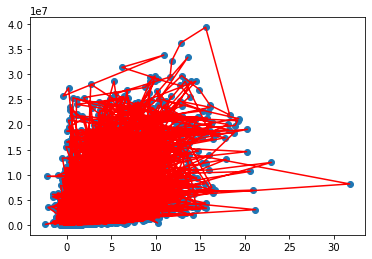

[  117093.85505414  -932083.80814421 -1618911.18140137 ...
  1223618.38228519  -704346.03333923   -88914.90099303]
8388131.959484449


In [40]:
# Let's plot the predictions as a red line against the data points
plt.scatter(X_regression, y_regression)
plt.plot(X_regression, y_regression_pred, color='red')
plt.show()

# Then print the slope and the y-intercept
print(model.coef_)
print(model.intercept_)

We can see from the plotted data that the model couldn't predict a line of best fit, and we can see that our data is just a blob, and isn't a linear line. We may want to explore placing the salaries into groups/clusters and seeing if the stats are predictive of the player's salary falling into a particular range

# Changing Machine Learning Model

In [41]:
# To create bins/groupings for our salaries 
# Excel was used to split the values into bins by counting how many values would be in each bin
# Trial and error was used until a farily even split was acheieved

# Bin ranges
bins = [0,1000000,2000000,3000000,5000000,10000000,15000000,20000000,25000000,40000000]

# Bin names
salary_ranges = [
    '0 To 999999',
    '1000000 To 1999999',
    '2000000 To 2999999',
    '3000000 To 4999999',
    '5000000 To 9999999',
    '10000000 To 14999999',
    '15000000 To 19999999',
    '20000000 To 24999999',
    '25000000 To 39999999'
]

# Add column to dataframe
ML_df["Salary_Range"] = pd.cut(ML_df["adjusted_salary"], bins, labels=salary_ranges)
ML_df.head(10)

<ipython-input-41-b4f5e77996e9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML_df["Salary_Range"] = pd.cut(ML_df["adjusted_salary"], bins, labels=salary_ranges)


,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary,Salary_Range
0,9688.0,A.C. Green,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,...,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707,3465334.74,3000000 To 4999999
1,10166.0,A.C. Green,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,...,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524,3325398.31,3000000 To 4999999
2,10617.0,A.C. Green,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,...,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476,3228219.89,3000000 To 4999999
3,11060.0,A.C. Green,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,...,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402,3376185.02,3000000 To 4999999
8,13600.0,A.C. Green,1998.0,34.0,82.0,68.0,2649.0,12.8,0.496,0.007,...,78.0,27.0,68.0,157.0,600.0,19.0,31.0,0.380,8137602.15,5000000 To 9999999
9,14139.0,A.C. Green,1999.0,35.0,50.0,35.0,924.0,12.5,0.441,0.031,...,28.0,8.0,19.0,69.0,246.0,40.0,42.0,0.488,2640928.57,2000000 To 2999999
10,14648.0,A.C. Green,2000.0,36.0,82.0,82.0,1929.0,11.2,0.482,0.010,...,53.0,18.0,53.0,127.0,413.0,56.0,26.0,0.683,3381676.83,3000000 To 4999999
15,15151.0,A.J. Guyton,2001.0,22.0,33.0,8.0,630.0,10.3,0.495,0.359,...,9.0,5.0,24.0,35.0,198.0,21.0,61.0,0.256,680785.46,0 To 999999
16,15684.0,A.J. Guyton,2002.0,23.0,45.0,6.0,607.0,11.8,0.477,0.504,...,10.0,7.0,37.0,23.0,244.0,30.0,52.0,0.366,26971.59,0 To 999999
19,20357.0,A.J. Price,2010.0,23.0,56.0,2.0,865.0,14.0,0.530,0.492,...,35.0,3.0,59.0,53.0,410.0,37.0,45.0,0.451,904650.41,0 To 999999


In [42]:
# Get the summary statitics of each salary range to confirm a farily even split 
# looking at the splits it is not bad, about the same counts and the mean and std is not extremely far off
ML_df_bins = ML_df.groupby("Salary_Range")
ML_df_bins.describe()

playerid                                                \
                        count          mean          std      min       25%   
Salary_Range                                                                  
0 To 999999             864.0  15643.872512  4531.442766   9547.0  11573.00   
1000000 To 1999999     1302.0  16530.193932  4642.550932   9548.0  12020.50   
2000000 To 2999999      832.0  16334.732873  4369.939240   9549.0  12189.75   
3000000 To 4999999     1205.0  16883.040456  4196.728946   9569.0  13264.00   
5000000 To 9999999     1245.0  18015.839960  3552.014136  10138.0  15295.00   
10000000 To 14999999    451.0  19289.156319  2980.736635  12359.0  17203.00   
15000000 To 19999999    290.0  19393.568966  2987.296837  13649.0  16674.50   
20000000 To 24999999    119.0  19945.781513  2847.627267  12476.0  17466.00   
25000000 To 39999999     37.0  20115.756757  3349.153163  14120.0  17622.00   

                                                    year               ...  \
                          50%       75%      max   count         mean  ...   
Salary_Range                                                           ...   
0 To 999999           14920.0  19624.50  24088.0   864.0  2001.449074  ...   
1000000 To 1999999    16432.5  20839.75  24090.0  1302.0  2003.078341  ...   
2000000 To 2999999    16269.5  20059.00  24082.0   832.0  2002.782452  ...   
3000000 To 4999999    16739.0  20665.00  24058.0  1205.0  2003.818257  ...   
5000000 To 9999999    17973.0  21064.00  24091.0  1245.0  2005.942169  ...   
10000000 To 14999999  19519.0  21830.50  24055.0   451.0  2008.290466  ...   
15000000 To 19999999  19360.0  21966.00  24060.0   290.0  2008.475862  ...   
20000000 To 24999999  20255.0  22454.00  23973.0   119.0  2009.487395  ...   
25000000 To 39999999  20006.0  23617.00  24070.0    37.0  2009.783784  ...   

                     win_percentageavg        adjusted_salary                \
                                   75%    max           count          mean   
Salary_Range                                                                  
0 To 999999                   0.610000  0.878           864.0  6.235870e+05   
1000000 To 1999999            0.615625  0.890          1302.0  1.447003e+06   
2000000 To 2999999            0.610000  0.890           832.0  2.453862e+06   
3000000 To 4999999            0.610000  0.890          1205.0  3.892117e+06   
5000000 To 9999999            0.610000  0.890          1245.0  7.067704e+06   
10000000 To 14999999          0.622000  0.890           451.0  1.222741e+07   
15000000 To 19999999          0.659000  0.890           290.0  1.725612e+07   
20000000 To 24999999          0.659000  0.864           119.0  2.213302e+07   
25000000 To 39999999          0.622000  0.793            37.0  2.834131e+07   

                                                                            \
                               std          min           25%          50%   
Salary_Range                                                                 
0 To 999999           2.876359e+05      9629.92  4.082583e+05    680785.46   
1000000 To 1999999    2.827690e+05   1000586.97  1.200401e+06   1435177.39   
2000000 To 2999999    2.773959e+05   2000261.41  2.224023e+06   2425855.71   
3000000 To 4999999    5.691264e+05   3002359.62  3.389435e+06   3816678.25   
5000000 To 9999999    1.376704e+06   5005284.33  5.870437e+06   6887458.18   
10000000 To 14999999  1.429960e+06  10003124.54  1.094449e+07  12116030.52   
15000000 To 19999999  1.343861e+06  15026520.08  1.612285e+07  17184822.57   
20000000 To 24999999  1.403874e+06  20016235.86  2.099282e+07  21925111.07   
25000000 To 39999999  3.301368e+06  25017666.98  2.569081e+07  27787978.89   

                                                 
                               75%          max  
Salary_Range                                     
0 To 999999           8.764225e+05    997756.01  
1000000 To 1999999    1.665026e+06   1999536.70  

In [43]:
# Print out columns of our dataframe again
ML_df.columns

Index(['playerid', 'playername', 'year', 'age', 'gamessum', 'gamestartedsum',
       'mpsum', 'peravg', 'ts_percentageavg', 'threeparavg', 'ftravg',
       'owssum', 'dwssum', 'wssum', 'fgsum', 'fgasum', 'fg_percentageavg',
       'threepsum', 'threepasum', 'threep_percentageavg', 'twopsum',
       'twopasum', 'twop_percentageavg', 'efg_percentageavg', 'ftsum',
       'ftasum', 'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum',
       'stlsum', 'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg', 'adjusted_salary', 'Salary_Range'],
      dtype='object')

In [44]:
# View dataframe to confirm binning worked 
ML_df.sample(25)

,playerid,playername,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,...,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg,adjusted_salary,Salary_Range
2806,12856.0,Darrell Armstrong,1997.0,28.0,67.0,0.0,1010.0,14.700000,0.525,0.525000,...,61.0,9.0,99.0,114.0,411.0,41.000000,41.000000,0.500000,564385.36,0 To 999999
5704,20693.0,Jeremy Evans,2011.0,23.0,49.0,3.0,463.0,18.800000,0.678,0.009000,...,17.0,17.0,19.0,50.0,178.0,36.000000,30.000000,0.545000,876968.65,0 To 999999
10134,23082.0,Rudy Gobert,2015.0,22.0,82.0,37.0,2158.0,21.600000,0.627,0.005000,...,64.0,189.0,111.0,175.0,686.0,40.000000,42.000000,0.488000,1284003.59,1000000 To 1999999
8856,21123.0,Nick Young,2011.0,25.0,64.0,40.0,2034.0,14.500000,0.538,0.290000,...,45.0,17.0,90.0,144.0,1115.0,20.000000,46.000000,0.303000,4252390.41,3000000 To 4999999
376,18170.0,Anderson Varejao,2006.0,23.0,48.0,4.0,760.0,14.800000,0.541,0.007000,...,31.0,19.0,27.0,118.0,219.0,50.000000,32.000000,0.610000,1213946.83,1000000 To 1999999
1910,21197.0,Chase Budinger,2012.0,23.0,58.0,9.0,1298.0,14.900000,0.556,0.465000,...,29.0,7.0,55.0,65.0,558.0,45.000000,37.000000,0.549000,997756.01,0 To 999999
2046,14637.0,Chris Gatling,2000.0,32.0,170.0,0.0,3622.0,17.266667,0.525,0.091667,...,164.0,46.0,338.0,492.0,2028.0,41.500000,40.500000,0.506000,8341469.51,5000000 To 9999999
5070,14927.0,Jacque Vaughn,2000.0,24.0,78.0,0.0,884.0,9.200000,0.489,0.130000,...,32.0,0.0,77.0,92.0,289.0,53.000000,29.000000,0.646000,2254451.22,2000000 To 2999999
12042,19249.0,Wally Szczerbiak,2008.0,30.0,150.0,4.0,3472.0,13.300000,0.521,0.291667,...,46.0,24.0,152.0,206.0,1722.0,66.000000,16.000000,0.805000,16558624.47,15000000 To 19999999
1754,21199.0,Caron Butler,2012.0,31.0,63.0,63.0,1871.0,11.700000,0.501,0.365000,...,52.0,9.0,77.0,123.0,753.0,56.000000,26.000000,0.683000,9018040.54,5000000 To 9999999


In [45]:
# Create a copy of the dataframe, dropping non-numeric/non-predictive columns not needed for the machine learning model
X = ML_df.copy()
X = X.drop(columns=["playerid", "playername","adjusted_salary","Salary_Range"], axis=1)
X.head()

,year,age,gamessum,gamestartedsum,mpsum,peravg,ts_percentageavg,threeparavg,ftravg,owssum,...,trbsum,astsum,stlsum,blksum,tovsum,pfsum,ptssum,winsavg,lossesavg,win_percentageavg
0,1990.0,26.0,82.0,82.0,2709.0,14.7,0.548,0.057,0.459,4.4,...,712.0,90.0,66.0,50.0,116.0,207.0,1061.0,58.0,24.0,0.707
1,1991.0,27.0,82.0,21.0,2164.0,13.8,0.556,0.101,0.557,3.2,...,516.0,71.0,59.0,23.0,99.0,117.0,750.0,43.0,39.0,0.524
2,1992.0,28.0,82.0,53.0,2902.0,16.7,0.556,0.070,0.569,5.8,...,762.0,117.0,91.0,36.0,111.0,141.0,1116.0,39.0,43.0,0.476
3,1993.0,29.0,82.0,55.0,2819.0,16.3,0.603,0.065,0.531,6.1,...,711.0,116.0,88.0,39.0,116.0,149.0,1051.0,33.0,49.0,0.402
8,1998.0,34.0,82.0,68.0,2649.0,12.8,0.496,0.007,0.303,2.8,...,668.0,123.0,78.0,27.0,68.0,157.0,600.0,19.0,31.0,0.380


In [46]:
# Confirm that the columns only have the information we need  
X.columns

Index(['year', 'age', 'gamessum', 'gamestartedsum', 'mpsum', 'peravg',
       'ts_percentageavg', 'threeparavg', 'ftravg', 'owssum', 'dwssum',
       'wssum', 'fgsum', 'fgasum', 'fg_percentageavg', 'threepsum',
       'threepasum', 'threep_percentageavg', 'twopsum', 'twopasum',
       'twop_percentageavg', 'efg_percentageavg', 'ftsum', 'ftasum',
       'ft_percentageavg', 'orbsum', 'drbsum', 'trbsum', 'astsum', 'stlsum',
       'blksum', 'tovsum', 'pfsum', 'ptssum', 'winsavg', 'lossesavg',
       'win_percentageavg'],
      dtype='object')

In [47]:
# Define a new target variable as the Salary range rather than just a salary figure/number
y = ML_df["Salary_Range"].values.reshape(-1, 1)

In [49]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:181: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return array[key] if axis == 0 else array[:, key]


In [50]:
# View our training/test data to ensure they are the same size 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4758, 37)
(1587, 37)
(4758, 1)
(1587, 1)


In [51]:
# Now that we have split our data into training and testing sets, we can scale the data using Scikit-learn's StandardScaler
# Creating StandardScaler instance to scale the data so that they are a similar "size"/"range" for comparative reasons
scaler = StandardScaler()

In [52]:
# Fitting Standard Scaller
# To scale our data, we'll use the StandardScaler as before and fit the instance, scaler, with the training data
X_scaler = scaler.fit(X_train)

In [53]:
# Scaling data
# Scale the features with the transform() method:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# Create a random forest classifier.
# We will switch to random forest to be able to classify salaries as ranges/groups rather than trying to output a value
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

<ipython-input-54-ee3c2fb1d9c5>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [55]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [56]:
# Calculating the confusion matrix
# The following code block creates the confusion_matrix using the y_test and the predictions that we just calculated and 
    # adds the confusion_matrix array to a DataFrame:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=[
        'Actual 0 To 999999',
        'Actual 1000000 To 1999999',
        'Actual 2000000 To 2999999',
        'Actual 3000000 To 4999999',
        'Actual 5000000 To 9999999',
        'Actual 10000000 To 14999999',
        'Actual 15000000 To 19999999',
        'Actual 20000000 To 24999999',
        'Actual 25000000 To 39999999'
], 
    columns=['Predicted 0 To 999999',
    'Predicted 1000000 To 1999999',
    'Predicted 2000000 To 2999999',
    'Predicted 3000000 To 4999999',
    'Predicted 5000000 To 9999999',
    'Predicted 10000000 To 14999999',
    'Predicted 15000000 To 19999999',
    'Predicted 20000000 To 24999999',
    'Predicted 25000000 To 39999999']
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [57]:
# Displaying results
# Support: Support is the number of actual occurrences of the class in the specified dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0 To 999999,Predicted 1000000 To 1999999,Predicted 2000000 To 2999999,Predicted 3000000 To 4999999,Predicted 5000000 To 9999999,Predicted 10000000 To 14999999,Predicted 15000000 To 19999999,Predicted 20000000 To 24999999,Predicted 25000000 To 39999999
Actual 0 To 999999,93,87,2,16,10,0,0,0,0
Actual 1000000 To 1999999,50,156,12,72,42,0,0,0,0
Actual 2000000 To 2999999,23,84,13,61,34,2,2,0,0
Actual 3000000 To 4999999,13,61,11,95,98,2,3,0,0
Actual 5000000 To 9999999,4,32,3,82,164,11,13,1,0
Actual 10000000 To 14999999,0,3,0,12,68,28,8,0,0
Actual 15000000 To 19999999,1,2,0,6,29,22,12,3,0
Actual 20000000 To 24999999,0,1,1,2,12,5,8,3,0
Actual 25000000 To 39999999,1,0,0,0,2,1,4,1,0


Accuracy Score : 0.3553875236294896
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.45      0.47       208
           1       0.37      0.47      0.41       332
           2       0.31      0.06      0.10       219
           3       0.27      0.34      0.30       283
           4       0.36      0.53      0.43       310
           5       0.39      0.24      0.29       119
           6       0.24      0.16      0.19        75
           7       0.38      0.09      0.15        32
           8       0.00      0.00      0.00         9

    accuracy                           0.36      1587
   macro avg       0.31      0.26      0.26      1587
weighted avg       0.35      0.36      0.33      1587



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Another reason we wanted to use the random forest algorithm is to rank the features by their importance, 
# which allows us to see which features have the most impact on the decision

# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# The output from this code returns an array of scores for the features in the X_test set, whose sum equals 1.0
importances

# We can run this and see which feature are more important to the model to see if there are any that stand out 
# looking at the results it appears that there is not much of a difference amongst the various stats 
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.049506300588845614, 'year'),
 (0.03680973130516038, 'age'),
 (0.03616333003591539, 'peravg'),
 (0.034123580023781346, 'gamessum'),
 (0.032446497179969114, 'wssum'),
 (0.03217989292940728, 'drbsum'),
 (0.031428957324051654, 'ptssum'),
 (0.02895335184730889, 'mpsum'),
 (0.02811522593260269, 'fgsum'),
 (0.02769140828776351, 'pfsum'),
 (0.02743874453245153, 'ft_percentageavg'),
 (0.027396237121522213, 'gamestartedsum'),
 (0.027065014807881625, 'trbsum'),
 (0.02664014225250788, 'fgasum'),
 (0.026589279059211268, 'ftravg'),
 (0.02646603933876224, 'stlsum'),
 (0.02633496557798051, 'ftsum'),
 (0.026036652029704937, 'ftasum'),
 (0.02597246877551575, 'blksum'),
 (0.02540709761835907, 'tovsum'),
 (0.025366046847083695, 'astsum'),
 (0.025077631223233008, 'twop_percentageavg'),
 (0.02497724170034161, 'owssum'),
 (0.02472341555341771, 'twopsum'),
 (0.0244394169303306, 'twopasum'),
 (0.02407430686122423, 'ts_percentageavg'),
 (0.024067251807960353, 'fg_percentageavg'),
 (0.023683845904051235, 'ef